In [24]:
#IMPORTING LIBRARIES

In [14]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime
from collections import Counter
import random

In [ ]:
#GETTING FILES FROM DIRECTORIES

In [2]:
# Function to load data from a JSON file
def load_json_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

# Paths to your files in the specified directory        
search_queries_file = 'C:\\Users\\musta\\OneDrive\\Masaüstü\\File Directory\\SearchQueries.json'
playlist_file = 'C:\\Users\\musta\\OneDrive\\Masaüstü\\File Directory\\Playlist1.json'
streaming_history_file1 = 'C:\\Users\\musta\\OneDrive\\Masaüstü\\File Directory\\StreamingHistory0.json'
streaming_history_file2 = 'C:\\Users\\musta\\OneDrive\\Masaüstü\\File Directory\\StreamingHistory1.json'
userdata_file = 'C:\\Users\\musta\\OneDrive\\Masaüstü\\File Directory\\Userdata.json'


# Load data from these files
search_queries_data = load_json_data(search_queries_file)
playlist_data = load_json_data(playlist_file)
streaming_history_data1 = load_json_data(streaming_history_file1)
streaming_history_data2 = load_json_data(streaming_history_file2)



In [66]:
# Load Userdata
userdata = load_json_data(userdata_file)

# Extracting relevant data
username = userdata.get("username")
country = userdata.get("country")
birthdate = userdata.get("birthdate")  # Make sure this field name matches your JSON structure
gender = userdata.get("gender")
creation_time = userdata.get("creationTime")  # Make sure this field name matches your JSON structure

# Calculating age from birthdate
def calculate_age(birthdate_str):
    birthdate = datetime.strptime(birthdate_str, '%Y-%m-%d')
    today = datetime.today()
    return today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))

age = calculate_age(birthdate)

# Calculating account age from creation time
def calculate_account_age(creation_time_str):
    creation_date = datetime.strptime(creation_time_str, '%Y-%m-%d')
    today = datetime.today()
    return today.year - creation_date.year - ((today.month, today.day) < (creation_date.month, creation_date.day))

account_age = calculate_account_age(creation_time)

# Function to create a visually enhanced text display
def display_user_profile(username, country, age, gender, account_age):
    line_length = 50  # Length of each line in the display

    # Function to center text within a line
    def center_text(text, length=line_length):
        return text.center(length, ' ')

    # Building the display
    print("*" * line_length)
    print(center_text(f"User Profile: {username}"))
    print("*" * line_length)
    print(center_text(f"Country: {country}"))
    print(center_text(f"Age: {age} years"))
    print(center_text(f"Gender: {gender}"))
    print(center_text(f"Account Age: {account_age} years"))
    print("*" * line_length)

# Display the user profile
display_user_profile(username, country, age, gender, account_age)

**************************************************
           User Profile: mustafakiraz06           
**************************************************
                   Country: TR                    
                  Age: 20 years                   
                   Gender: male                   
               Account Age: 6 years               
**************************************************


In [ ]:
#DATA ANALYSIS

In [3]:

# Combine streaming history data and prepare for analysis
combined_streaming_data = streaming_history_data1 + streaming_history_data2
df_streaming = pd.DataFrame(combined_streaming_data)
df_streaming['endTime'] = pd.to_datetime(df_streaming['endTime'])
df_streaming['year'] = df_streaming['endTime'].dt.year
df_streaming['month'] = df_streaming['endTime'].dt.month

# Convert msPlayed to hoursPlayed
df_streaming['hoursPlayed'] = df_streaming['msPlayed'] / 3600000

# Create a copy of the DataFrame slice for the year 2023
df_2023 = df_streaming[df_streaming['year'] == 2023].copy()

# Convert msPlayed to hoursPlayed and get month names
df_2023['hoursPlayed'] = df_2023['msPlayed'] / 3600000
df_2023['monthName'] = df_2023['month'].apply(lambda x: calendar.month_name[x])


In [ ]:
#PLOTTING FIRST INFORMATION


Displaying the top 5 tracks for January 2023


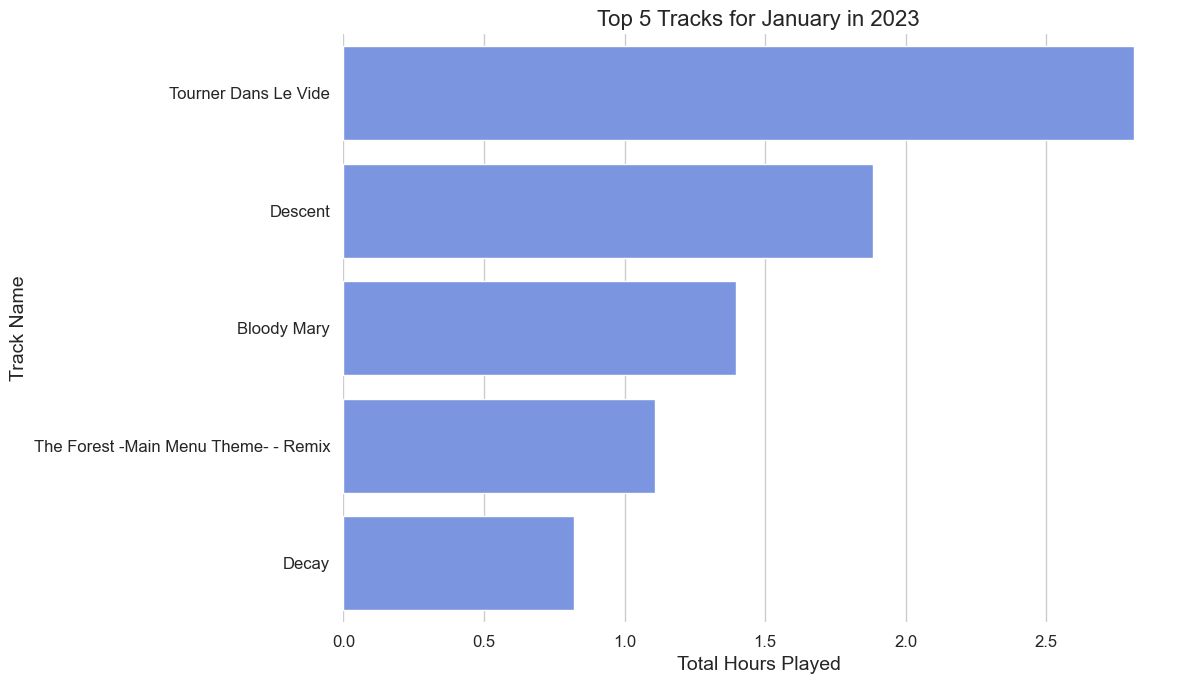


Displaying the top 5 tracks for February 2023


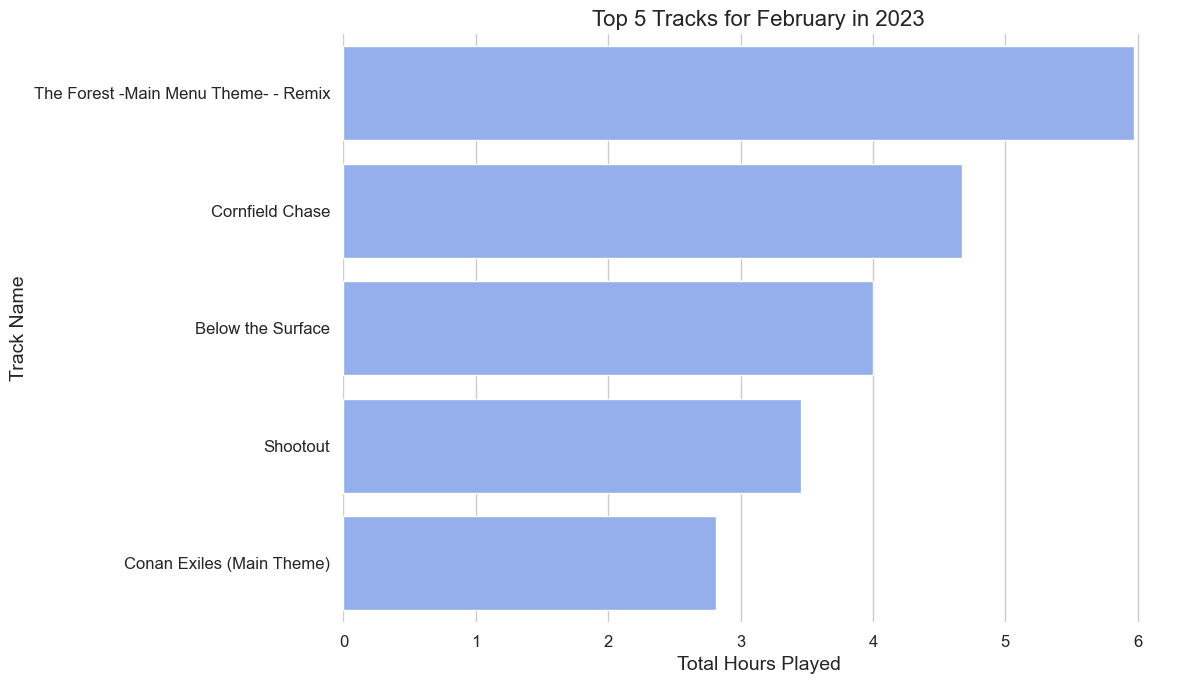


Displaying the top 5 tracks for March 2023


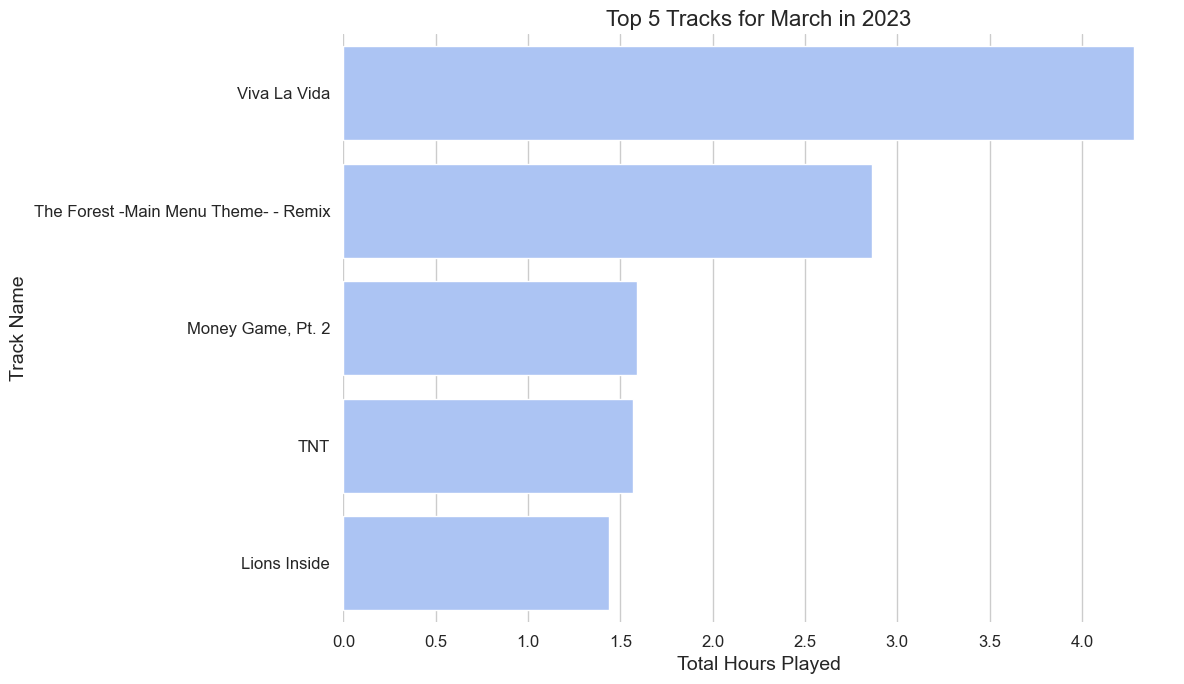


Displaying the top 5 tracks for April 2023


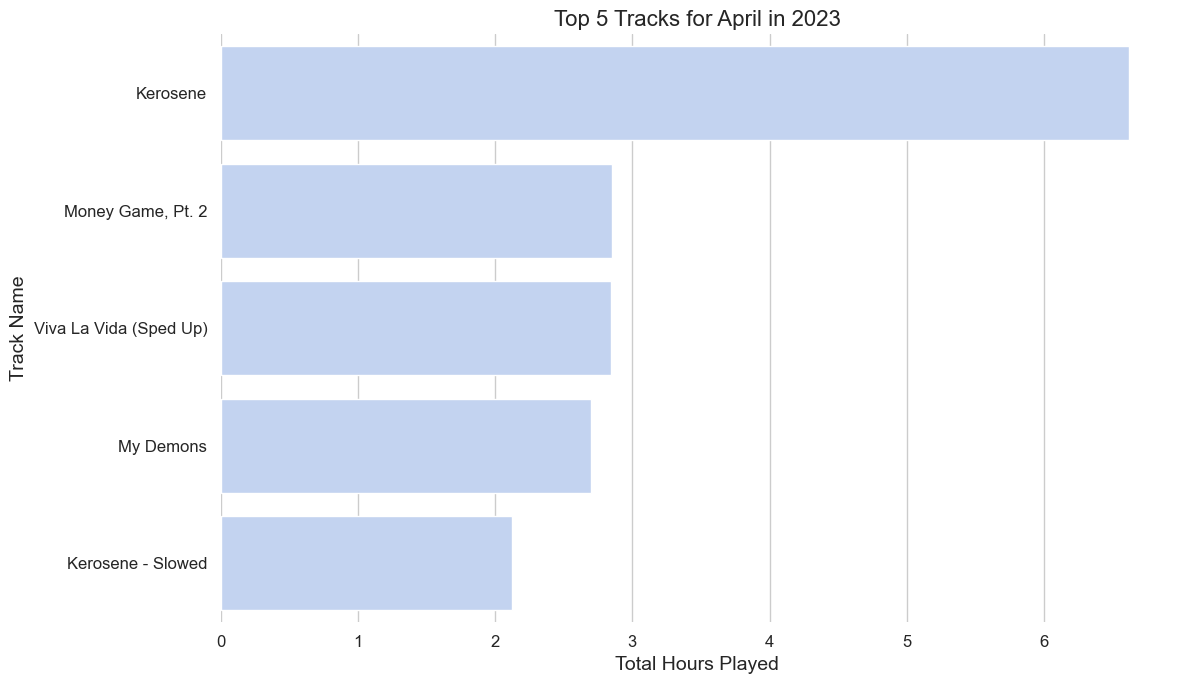


Displaying the top 5 tracks for May 2023


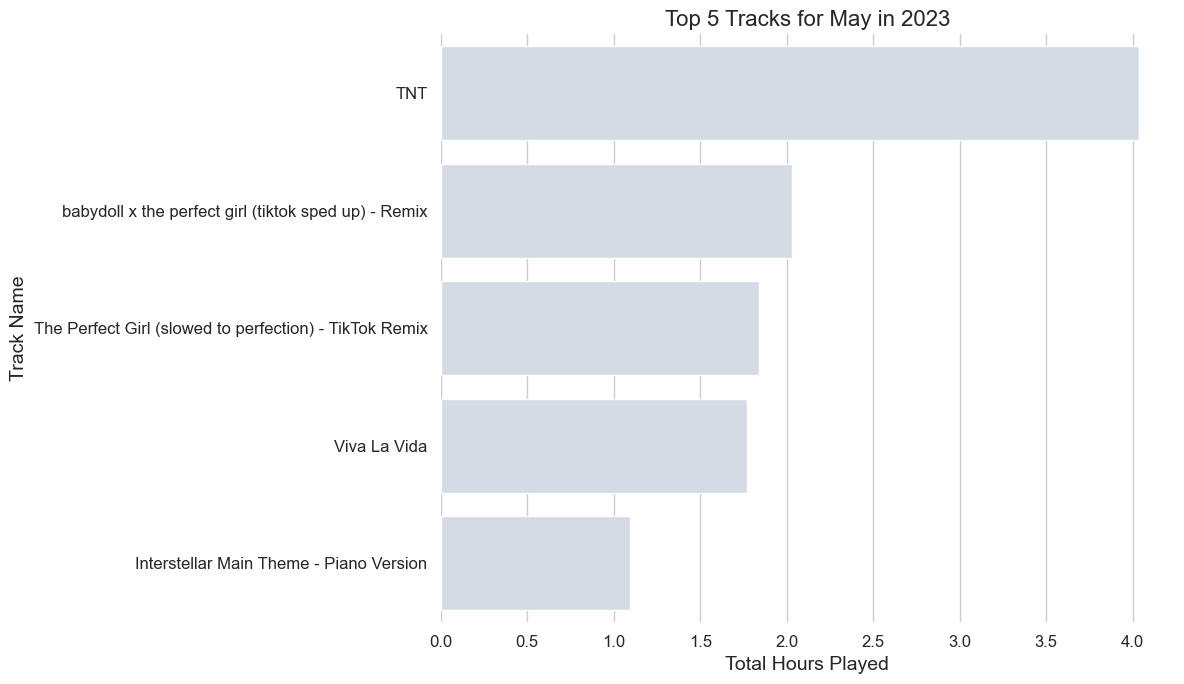


Displaying the top 5 tracks for June 2023


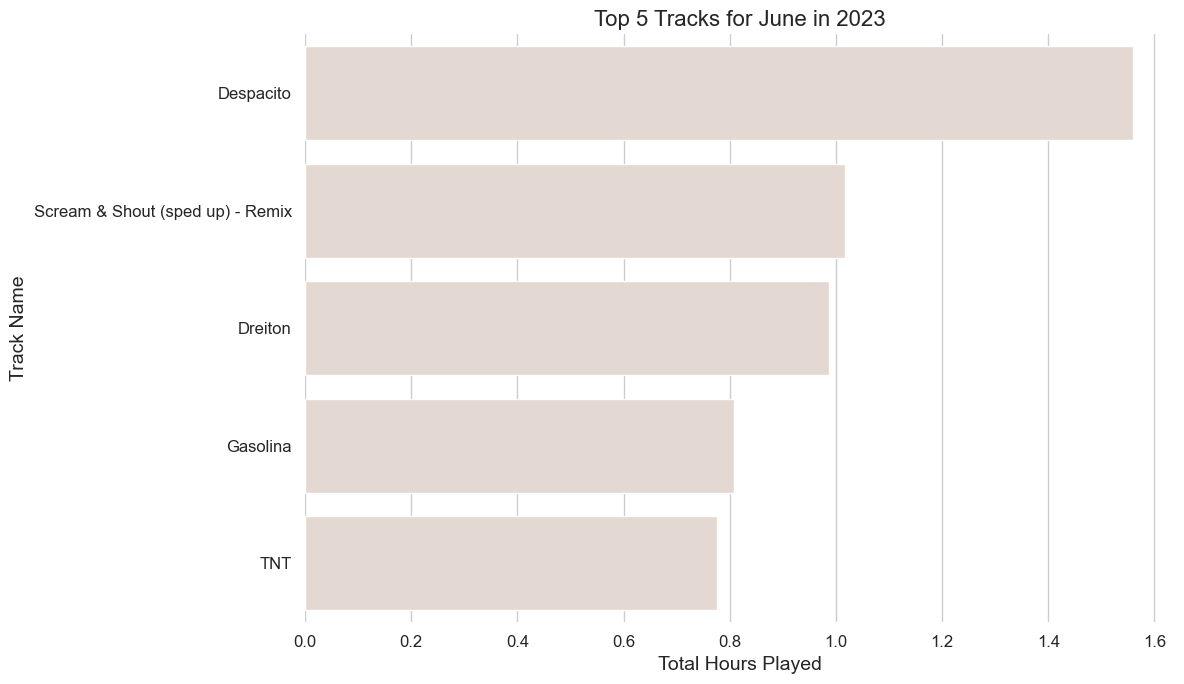


Displaying the top 5 tracks for July 2023


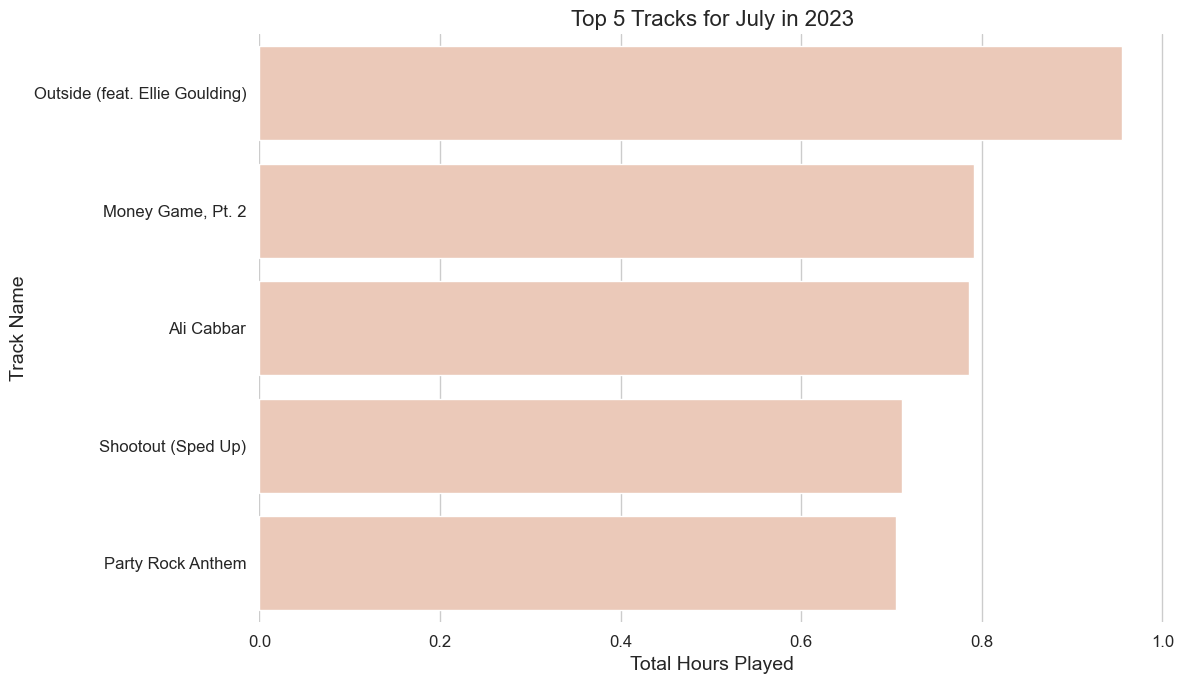


Displaying the top 5 tracks for August 2023


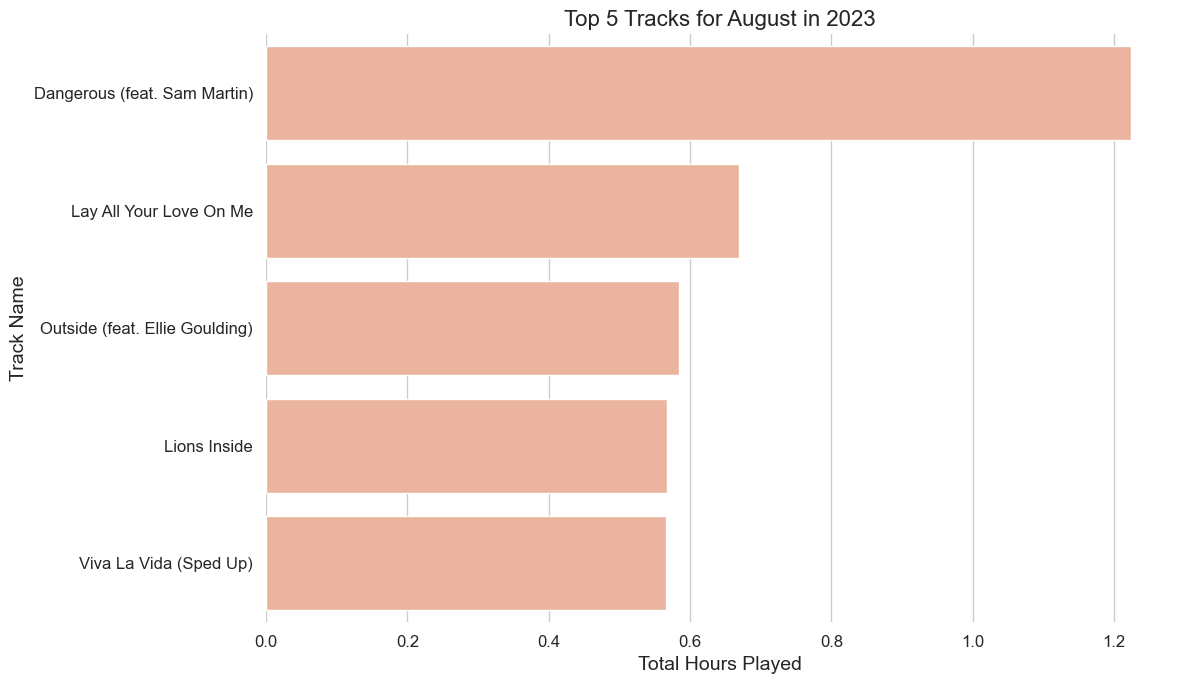


Displaying the top 5 tracks for September 2023


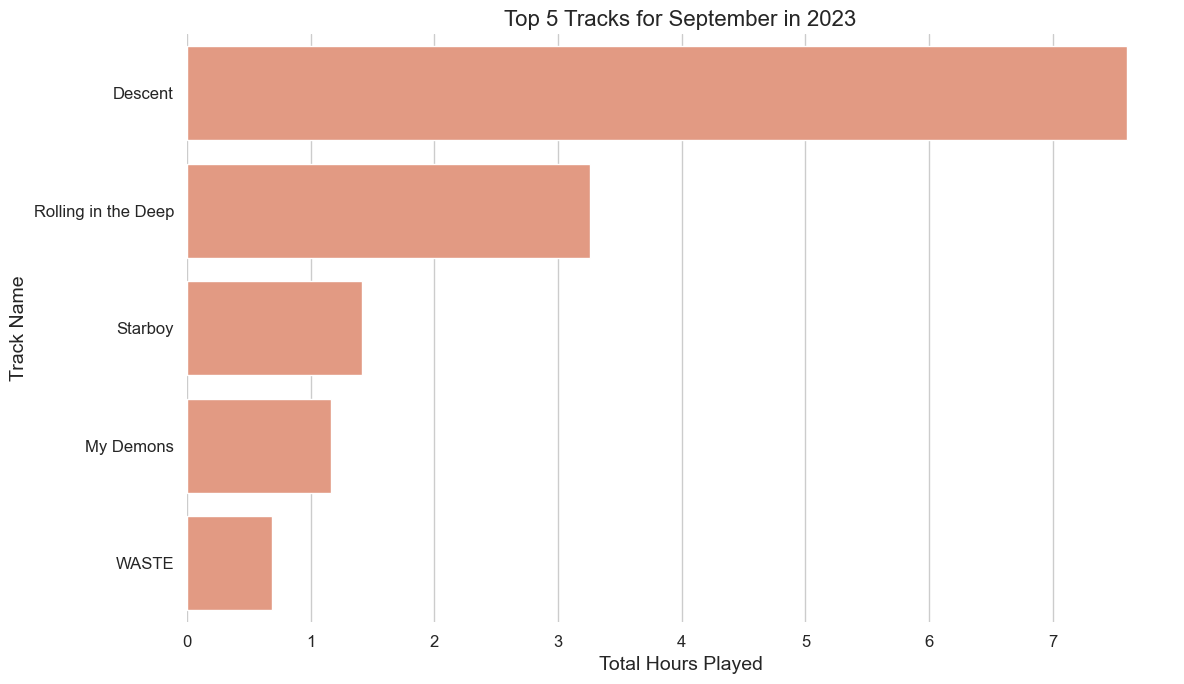


Displaying the top 5 tracks for October 2023


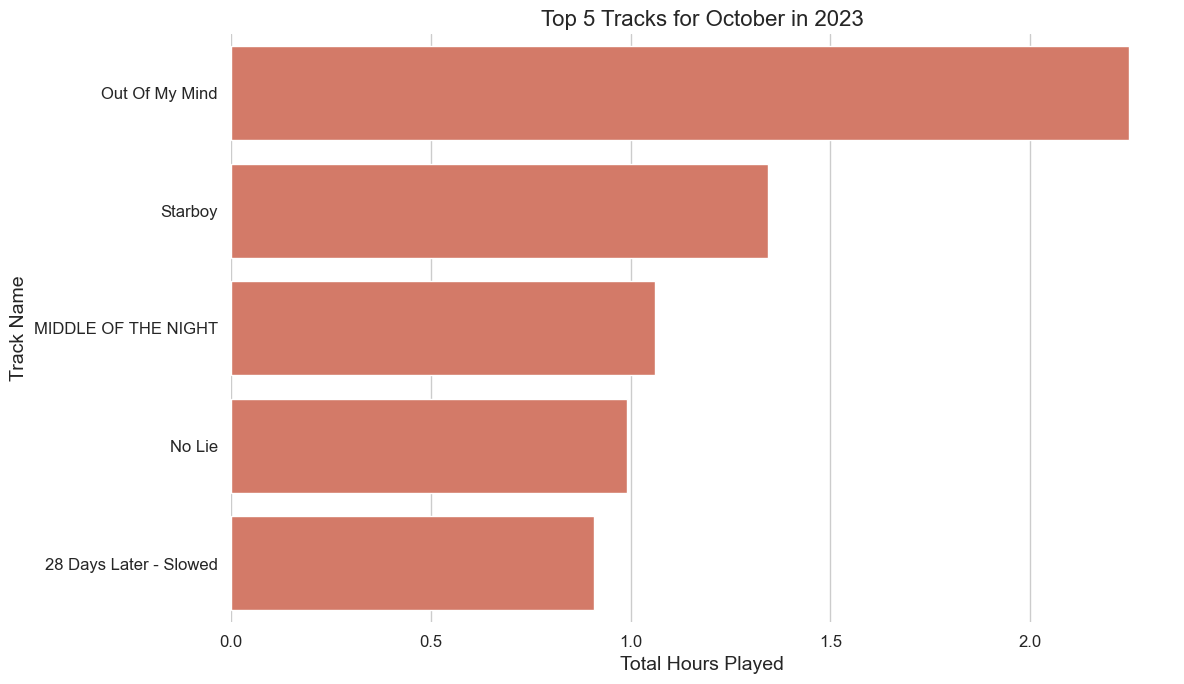


Displaying the top 5 tracks for November 2023


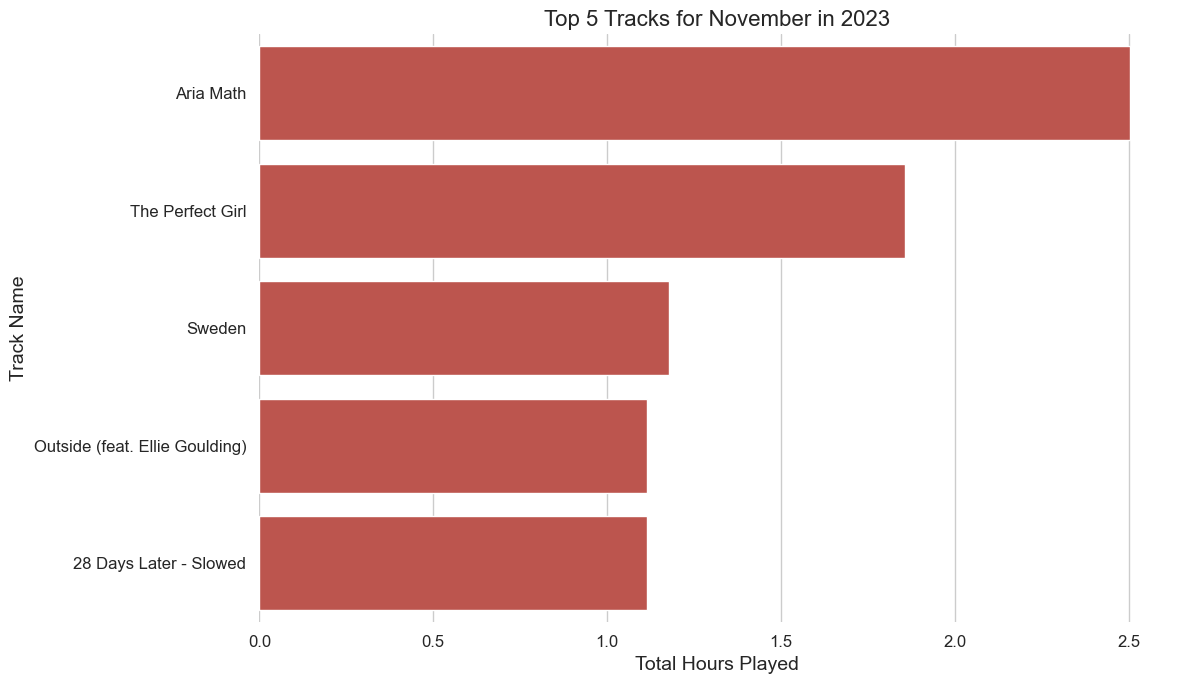


Displaying the top 5 tracks for December 2023


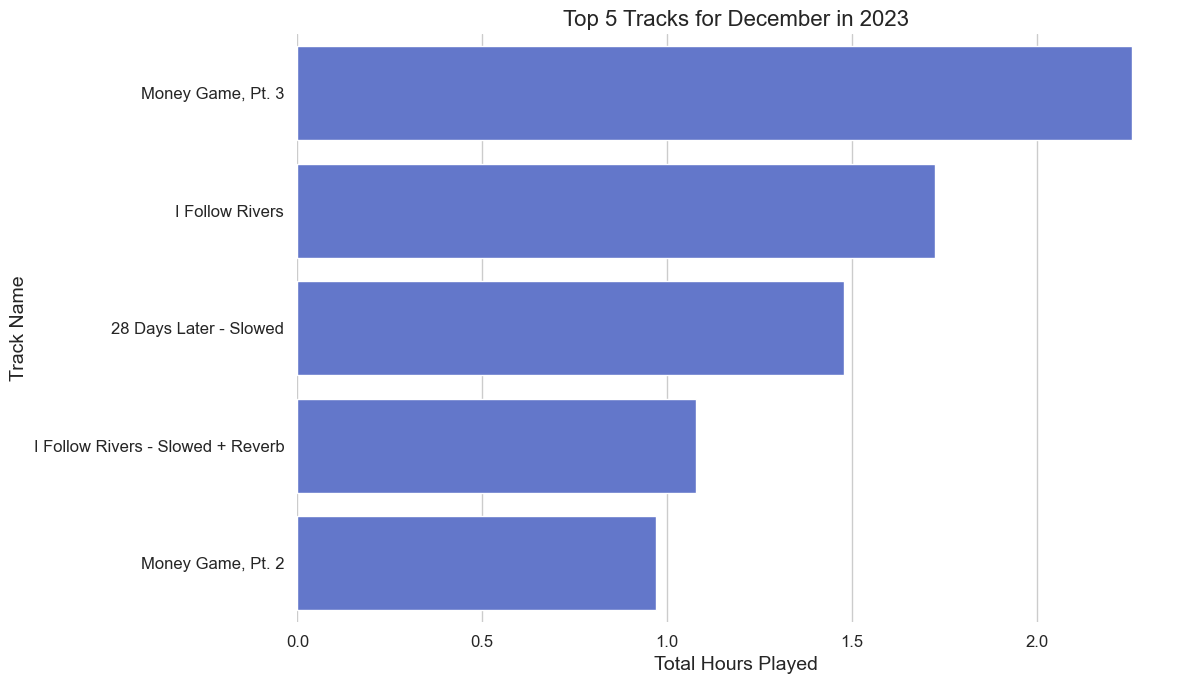

In [10]:
# Aggregate data for top tracks
grouped_data = df_2023.groupby(['monthName', 'trackName'])['hoursPlayed'].sum().reset_index()
top_tracks_per_month = grouped_data.groupby('monthName').apply(lambda x: x.nlargest(5, 'hoursPlayed')).reset_index(drop=True)

# month order
months_order = {month: index for index, month in enumerate(calendar.month_name) if month}
top_tracks_per_month['monthNumber'] = top_tracks_per_month['monthName'].map(months_order)
top_tracks_per_month = top_tracks_per_month.sort_values(by='monthNumber')

# chart plotting
sns.set(style="whitegrid")
colors = sns.color_palette("coolwarm", n_colors=12)  # Using a 'coolwarm' palette

for month_number in sorted(months_order.values()):
    month_name = calendar.month_name[month_number]
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Sort the month data by 'hoursPlayed' in descending order before plotting
    month_data = top_tracks_per_month[(top_tracks_per_month['monthNumber'] == month_number)].sort_values(by='hoursPlayed', ascending=False)

    # Print statement before each graph
    print(f"\n{'='*45}\nDisplaying the top 5 tracks for {month_name} 2023\n{'='*45}")
    
    color = colors[month_number % 12]  
    sns.barplot(x='hoursPlayed', y='trackName', data=month_data, hue='trackName', palette=[color] * len(month_data), dodge=False, ax=ax)
    ax.set_title(f'Top 5 Tracks for {month_name} in 2023', fontsize=16)
    ax.set_xlabel('Total Hours Played', fontsize=14)
    ax.set_ylabel('Track Name', fontsize=14)
    legend = ax.get_legend()
    if legend:
        legend.remove()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

In [ ]:
#PLOTTING SECOND INFORMATION

In [11]:
# Mapping tracks to their albums in playlists
track_to_album_map = {}
for playlist in playlist_data['playlists']:
    for item in playlist['items']:
        track = item.get('track')
        if track and 'trackName' in track and 'albumName' in track:
            track_to_album_map[track['trackName']] = track['albumName']

# Adding album information to streaming data
df_streaming['albumName'] = df_streaming['trackName'].map(track_to_album_map)

# Check if 'albumName' column has been successfully added
if 'albumName' not in df_streaming.columns:
    print("No album information available in streaming data.")


playlist_rows = []
for playlist in playlist_data['playlists']:
    playlist_name = playlist.get('name', 'Unknown Playlist')
    for item in playlist['items']:
        track = item.get('track')
        if track:
            track_name = track.get('trackName')
            if track_name:
                playlist_rows.append({'playlistName': playlist_name, 'trackName': track_name})

df_playlist_tracks = pd.DataFrame(playlist_rows)

# Function to find the most listened song and count of songs in each album of a playlist
def most_listened_song_and_count_in_each_album(playlist_name, df_playlist_tracks, df_streaming):
    playlist_info = {}
    playlist_tracks = df_playlist_tracks[df_playlist_tracks['playlistName'] == playlist_name]['trackName']

    # Filter streaming data for tracks in this playlist
    playlist_streaming_data = df_streaming[df_streaming['trackName'].isin(playlist_tracks)]

    for album in playlist_streaming_data['albumName'].unique():
        album_tracks = playlist_streaming_data[playlist_streaming_data['albumName'] == album]
        if not album_tracks.empty:
            most_listened_song_data = album_tracks.groupby('trackName')['hoursPlayed'].sum().nlargest(1).reset_index()
            if not most_listened_song_data.empty:
                most_listened_song = most_listened_song_data.iloc[0]['trackName']
                hours_played = most_listened_song_data.iloc[0]['hoursPlayed']
                song_count = len(album_tracks['trackName'].unique())
                playlist_info[album] = {
                    'most_listened_song': most_listened_song,
                    'hours_played': hours_played,
                    'song_count': song_count
                }
            else:
                playlist_info[album] = {'most_listened_song': "No data", 'hours_played': 0, 'song_count': 0}

    return playlist_info

# Finding the most listened song in each album for each playlist
all_playlist_info = {}
for playlist in set(df_playlist_tracks['playlistName']):
    all_playlist_info[playlist] = most_listened_song_and_count_in_each_album(playlist, df_playlist_tracks, df_streaming)

# Outputting the results
for playlist, albums_info in all_playlist_info.items():
    print(f"Playlist: '{playlist}'")
    for album, details in albums_info.items():
        most_listened_song = details['most_listened_song']
        hours_played = details['hours_played']
        song_count = details['song_count']
        print(f"  Album: '{album}', Most listened song in this album: '{most_listened_song}'\n Hours listened: {hours_played:.2f}, Number of songs from this album in the playlist: {song_count}")
    print("\n")
    

Playlist: 'Sleep'
  Album: 'Minecraft - Volume Alpha', Most listened song in this album: 'Sweden'
 Hours listened: 2.68, Number of songs from this album in the playlist: 5
  Album: 'Minecraft - Volume Beta', Most listened song in this album: 'Aria Math'
 Hours listened: 3.76, Number of songs from this album in the playlist: 3


Playlist: 'Sadece Hüzün'
  Album: 'From the Circus to the Sea, Pt. 2', Most listened song in this album: 'In This Shirt'
 Hours listened: 3.93, Number of songs from this album in the playlist: 1
  Album: '17', Most listened song in this album: 'Jocelyn Flores'
 Hours listened: 0.85, Number of songs from this album in the playlist: 1
  Album: 'The Marshall Mathers LP', Most listened song in this album: 'Stan'
 Hours listened: 1.86, Number of songs from this album in the playlist: 1
  Album: '?', Most listened song in this album: 'the remedy for a broken heart (why am I so in love)'
 Hours listened: 1.27, Number of songs from this album in the playlist: 2
  Album:

In [ ]:
#PLOTTING THIRD INFORMATION

Most Frequent Playlist among all playlists:  Vibin’ RN
----------------------------------------------------------------------
Most Common Platform Used for Spotify Searches:IPHONE (appeared 411 times)


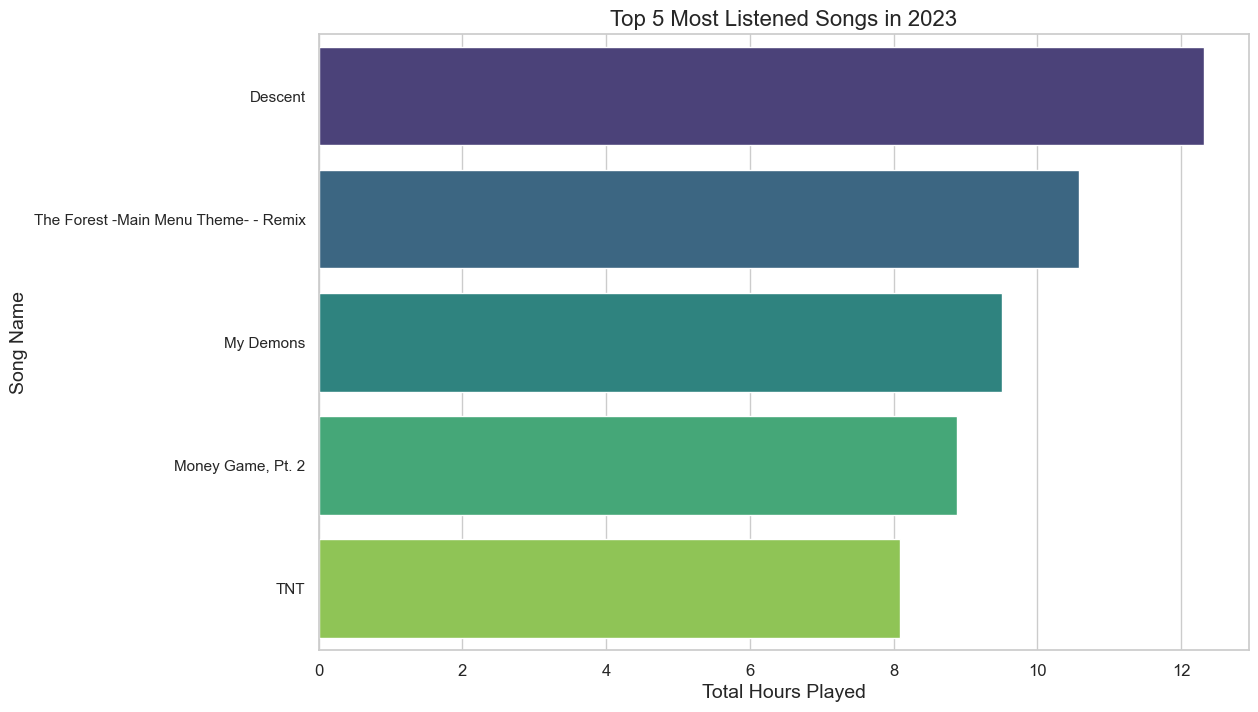

In [26]:
# Finding the top 5 most listened songs in 2023
top_5_songs_2023 = df_2023.groupby('trackName')['hoursPlayed'].sum().nlargest(5).reset_index()

# Plotting the top 5 most listened songs in 2023 with updated syntax
plt.figure(figsize=(12, 8))
sns.barplot(x='hoursPlayed', y='trackName', data=top_5_songs_2023, hue='trackName', palette='viridis', dodge=False, legend=False)
plt.title('Top 5 Most Listened Songs in 2023', fontsize=16)
plt.xlabel('Total Hours Played', fontsize=14)
plt.ylabel('Song Name', fontsize=14)
plt.xticks(fontsize=12)
plt

# Load the search queries data into a DataFrame
df_search_queries = pd.DataFrame(search_queries_data)

# Calculate the most common platform used for Spotify searches
most_common_platform = df_search_queries['platform'].mode()[0]
platform_count = df_search_queries['platform'].value_counts().max()

# Finding the most frequent playlist for these top 5 songs
top_5_song_names = top_5_songs_2023['trackName'].tolist()
top_5_playlists = df_playlist_tracks[df_playlist_tracks['trackName'].isin(top_5_song_names)]
most_frequent_playlist = top_5_playlists['playlistName'].mode()[0]

# Function to create a visually enhanced text display
def display_results(most_frequent_playlist, most_common_platform, platform_count):
    line_length = 70  # Length of each line in the display

    # Function to format and align text
    def format_text(label, value, length=line_length):
        # Adjust the space between label and value here
        total_label_space = 45
        padding = total_label_space - len(label)
        return f"{label}{' ' * padding}{value}"

    # Building the display
    print("=" * line_length)
    print(format_text("Most Frequent Playlist among all playlists:", most_frequent_playlist))
    print("-" * line_length)
    print(format_text("Most Common Platform Used for Spotify Searches:", f"{most_common_platform} (appeared {platform_count} times)"))
    print("=" * line_length)

# Display the results
display_results(most_frequent_playlist, most_common_platform, platform_count)

---------------------------------------------------------------------------------------------------------------------------------------------------------
My music listening habits are captured in the chart above, which displays the popularity trends of overlapping artists within different listener segments using a stacked bar chart
---------------------------------------------------------------------------------------------------------------------------------------------------------





<Figure size 1200x800 with 0 Axes>

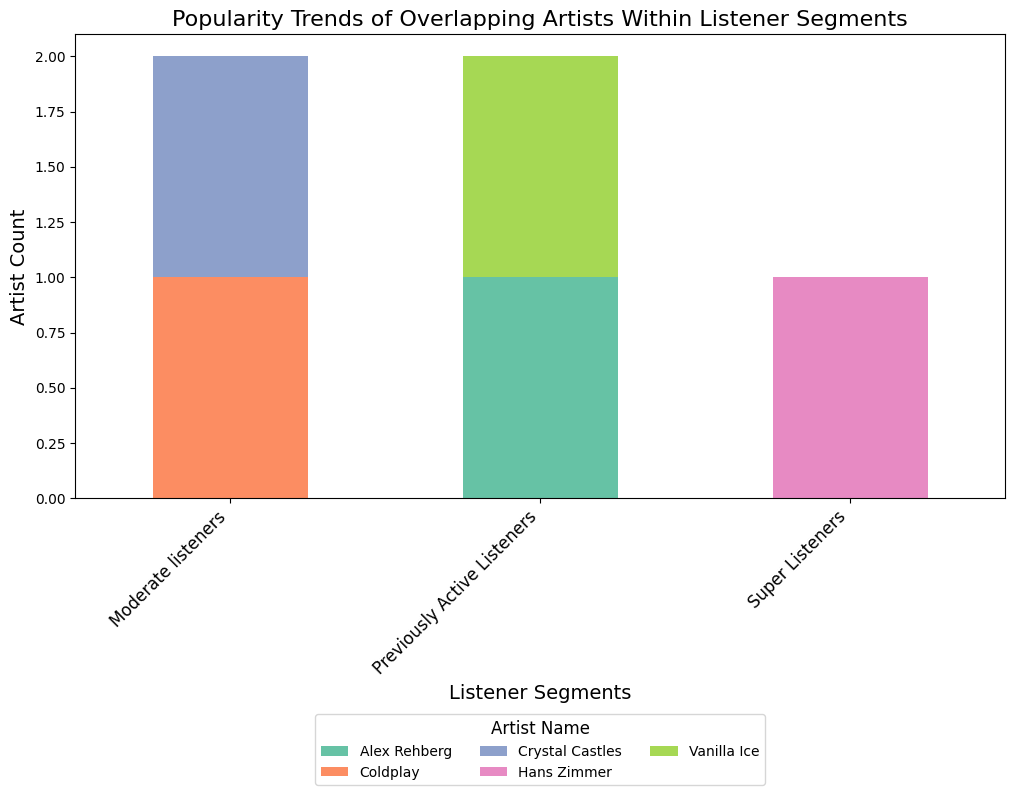

In [23]:
# Load Marquee data from the provided JSON file
marquee_file_path = 'C:\\Users\\musta\\OneDrive\\Masaüstü\\File Directory\\Marquee.json'
with open(marquee_file_path, 'r', encoding='utf-8') as marquee_file:
    marquee_data = json.load(marquee_file)


print("---------------------------------------------------------------------------------------------------------------------------------------------------------")
print("My music listening habits are captured in the chart above, which displays the popularity trends of overlapping artists within different listener segments using a stacked bar chart")
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")
print("")
print("")
print("")


# Creating a mapping of track names to artist names from the streaming history data
track_to_artist_map = df_streaming.set_index('trackName')['artistName'].to_dict()

# Applying this mapping to the top_tracks_per_month data
top_tracks_per_month['artistName'] = top_tracks_per_month['trackName'].map(track_to_artist_map)

# Now that we have accurate artist names, we can compare these with the Marquee data
# Extracting artist names from the Marquee data
marquee_artists = set([entry['artistName'] for entry in marquee_data])

# Finding the overlap between top artists per month and Marquee artists
top_artists_per_month = set(top_tracks_per_month['artistName'].unique())
overlapping_artists = top_artists_per_month.intersection(marquee_artists)

# Filter Marquee data for overlapping artists
df_marquee_overlapping = pd.DataFrame([entry for entry in marquee_data if entry['artistName'] in overlapping_artists])

# Count the occurrences of each artist within each listener segment
artist_segment_counts = df_marquee_overlapping.groupby(['segment', 'artistName']).size().unstack(fill_value=0)

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
palette = sns.color_palette("Set2", len(artist_segment_counts.columns))  # Use Set2 color palette
artist_segment_counts.plot(kind='bar', stacked=True, color=palette, figsize=(12, 8))

plt.title('Popularity Trends of Overlapping Artists Within Listener Segments', fontsize=16)
plt.xlabel('Listener Segments', fontsize=14)
plt.ylabel('Artist Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')

# Move the legend below the graph and adjust its position to start from left to right
plt.legend(title='Artist Name', title_fontsize=12, fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.45), ncol=3)

# Adjust the figure size and margins to prevent overlap
plt.subplots_adjust(bottom=0.3)

# Displaying the plot
plt.show()
